In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("malazan_stats.csv")

In [3]:
df

,Name,Army,Power_Level,Combat_Skill,Magic_Aptitude,Morale,Age,Years_of_Service
0,Anomander Rake,Bridgeburners,98,95,90,10,300,180
1,Tayschrenn,Claw,70,55,97,7,110,60
2,Whiskeyjack,Bridgeburners,85,88,20,9,55,35
3,Dujek Onearm,Malazan 2nd,78,82,10,8,60,40
4,Quick Ben,Bridgeburners,40,50,95,7,35,15
5,Icarium,Redmask’s Reavers,99,99,40,6,800,300
6,Karsa Orlong,Toblakai,97,90,5,8,35,10
7,Apsalar,Claw,60,70,30,7,22,5
8,Fiddler,Bridgeburners,55,65,15,8,40,20
9,Gruntle,Trake’s Legion,75,80,5,7,33,12


In [4]:
df.describe()

,Power_Level,Combat_Skill,Magic_Aptitude,Morale,Age,Years_of_Service
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,75.153846,71.307692,37.461538,7.500000,1444.000000,932.615385
std,19.398335,17.418999,36.625926,1.208305,3297.295243,2232.667733
min,20.000000,15.000000,0.000000,5.000000,22.000000,3.000000
25%,62.750000,65.000000,8.500000,7.000000,35.000000,10.500000
50%,78.000000,71.000000,17.500000,8.000000,43.500000,20.000000
75%,90.000000,81.500000,77.500000,8.000000,300.000000,195.000000
max,99.000000,99.000000,99.000000,10.000000,10000.000000,9000.000000


In [5]:
df['Combat_Skill'].mean()

71.3076923076923

In [6]:
df['Magic_Aptitude'].median()

17.5

In [7]:
df['Morale'].mode()

0    8
Name: Morale, dtype: int64

In [8]:
# 1. Mean Power_Level
mean_power = df["Power_Level"].mean()
print("Mean Power_Level:", mean_power)

# 2. Median Morale
median_morale = df["Morale"].median()
print("Median Morale:", median_morale)

# 3. Standard deviation of Combat_Skill
std_combat = df["Combat_Skill"].std()
print("Std Dev Combat_Skill:", std_combat)

# 4. Army with the highest average Magic_Aptitude
army_magic_means = df.groupby("Army")["Magic_Aptitude"].mean()
top_army = army_magic_means.idxmax()
top_value = army_magic_means.max()

print("\nAverage Magic Aptitude by Army:")
print(army_magic_means)

print("\nArmy with highest Magic Aptitude:", top_army, "(", top_value, ")")

Mean Power_Level: 75.15384615384616
Median Morale: 8.0
Std Dev Combat_Skill: 17.418999353049486

Average Magic Aptitude by Army:
Army
Bridgeburners        39.666667
Claw                 62.333333
Elder Races          85.000000
Letherii Guard        2.500000
Malazan 14th         10.000000
Malazan 2nd          10.000000
Redmask’s Reavers    40.000000
Shadow Court         89.500000
Tiste Andii          77.500000
Tiste Edur           11.666667
Toblakai              5.000000
Trake’s Legion        5.000000
T’lan Imass          10.000000
Name: Magic_Aptitude, dtype: float64

Army with highest Magic Aptitude: Shadow Court ( 89.5 )


<AxesSubplot:>

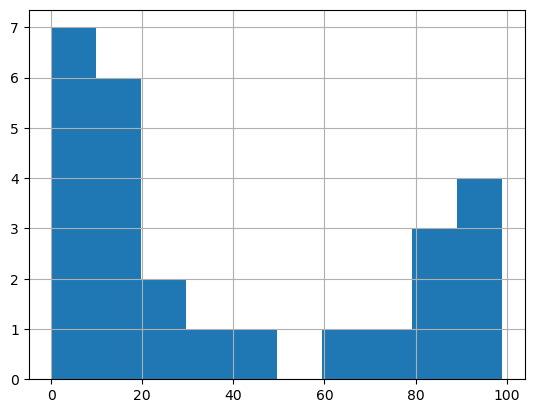

In [9]:
df['Magic_Aptitude'].hist(bins=10)

<AxesSubplot:xlabel='Combat_Skill', ylabel='Density'>

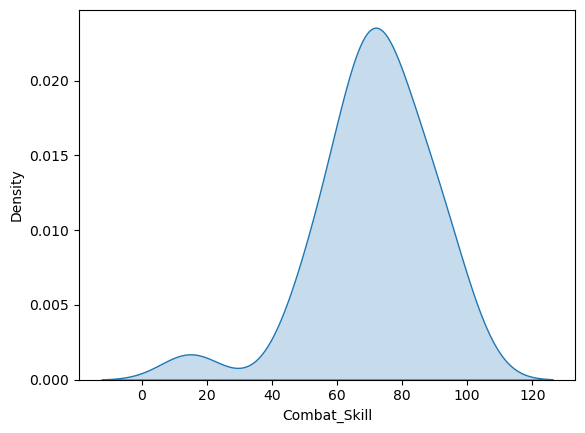

In [10]:
import seaborn as sns
sns.kdeplot(df['Combat_Skill'], fill=True)

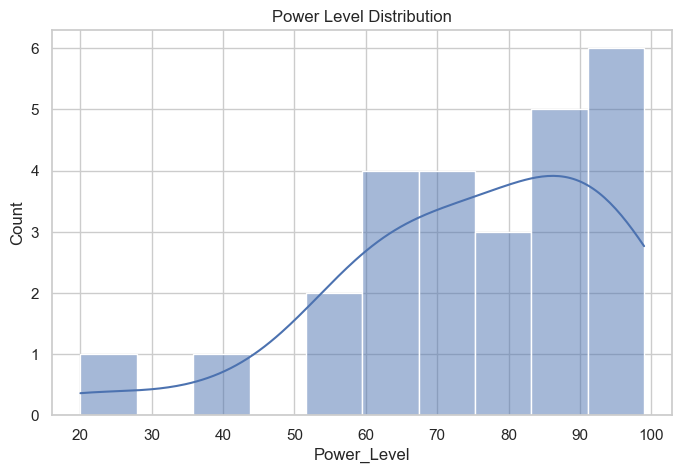

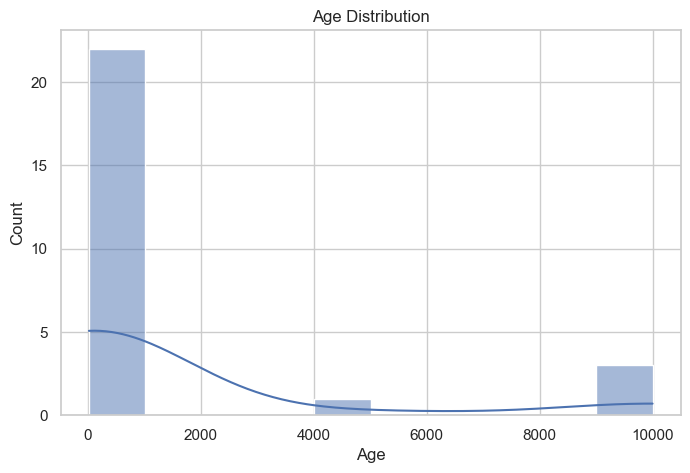

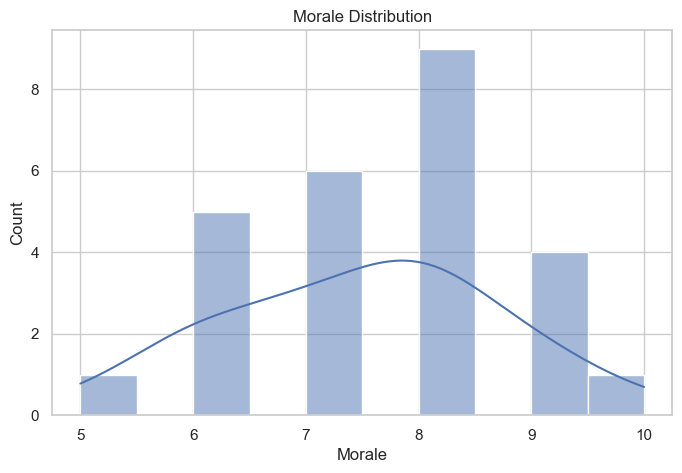

In [11]:
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# 1. Power Level Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Power_Level"], kde=True, bins=10)
plt.title("Power Level Distribution")
plt.show()

# 2. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, bins=10)
plt.title("Age Distribution")
plt.show()

# 3. Morale Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Morale"], kde=True, bins=10)
plt.title("Morale Distribution")
plt.show()

In [14]:
numerical_columns = ['Power_Level','Combat_Skill','Magic_Aptitude',
                    'Morale','Age','Years_of_Service']
df[numerical_columns].corr()

,Power_Level,Combat_Skill,Magic_Aptitude,Morale,Age,Years_of_Service
Power_Level,1.000000,0.732616,0.306617,0.201373,0.387257,0.368840
Combat_Skill,0.732616,1.000000,-0.073650,0.248961,-0.094689,-0.008415
Magic_Aptitude,0.306617,-0.073650,1.000000,0.298270,0.346155,0.240283
Morale,0.201373,0.248961,0.298270,1.000000,0.026987,-0.030025
Age,0.387257,-0.094689,0.346155,0.026987,1.000000,0.953346
Years_of_Service,0.368840,-0.008415,0.240283,-0.030025,0.953346,1.000000


<AxesSubplot:>

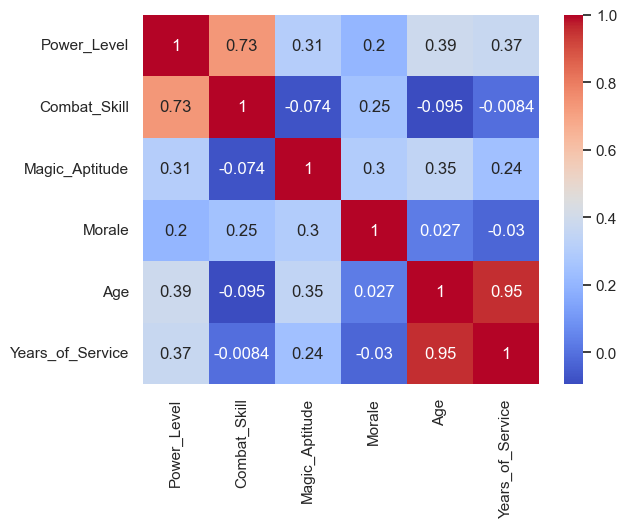

In [17]:
sns.heatmap(df[numerical_columns].corr(), annot=True, 
            cmap="coolwarm")

| Relationship           | Correlation Type | Explanation |
|------------------------|------------------|-------------|
| Age ↔ Years_of_Service | Strong positive  | Immortals have served for millennia |
| Power_Level ↔ Combat_Skill | High positive | Strong fighters are usually physically powerful |
| Magic_Aptitude ↔ Combat_Skill | Negative | Mages sacrifice physical training |
| Age ↔ Morale | Negative | Ancient beings carry heavy emotional burdens|


In [18]:
from scipy.stats import ttest_ind

bb = df[df['Army']=="Bridgeburners"]['Combat_Skill']
cl = df[df['Army']=="Claw"]['Combat_Skill']

ttest_ind(bb, cl)

Ttest_indResult(statistic=0.8268475783828972, pvalue=0.4355986237816998)

In [19]:
# Split groups
mages = df[df["Magic_Aptitude"] > 50]["Morale"]
non_mages = df[df["Magic_Aptitude"] <= 50]["Morale"]

# Perform independent t-test
t_stat, p_value = ttest_ind(mages, non_mages, equal_var=False)

print("Mage mean morale:", mages.mean())
print("Non-mage mean morale:", non_mages.mean())
print("t-statistic:", t_stat)
print("p-value:", p_value)

Mage mean morale: 8.0
Non-mage mean morale: 7.235294117647059
t-statistic: 1.5478201427587097
p-value: 0.14185418858520507


In [20]:
from scipy.stats import f_oneway

groups = [ df[df['Army']==a]['Power_Level'] for a in df['Army'].unique() ]
f_oneway(*groups)

F_onewayResult(statistic=1.641864990937993, pvalue=0.19361920808883276)

In [24]:
import numpy as np

samples = [df['Combat_Skill'].sample(frac=1, replace=True).mean()
           for _ in range(2000)]
np.percentile(samples, [2.5,97.5])

array([64.92307692, 77.4625    ])

✔ Meaning:

“If we resampled the Malazan commanders’ combat skill 2,000 times,
we are 95% confident the true mean lies between these two numbers.”

In [25]:
# Extract Magic_Aptitude values
vals = df["Magic_Aptitude"].values

# Compute mean
mean_magic = vals.mean()
print("Mean Magic_Aptitude:", mean_magic)

# Bootstrap 95% CI
samples = [
    np.mean(np.random.choice(vals, size=len(vals), replace=True))
    for _ in range(20000)
]

ci = np.percentile(samples, [2.5, 97.5])
print("95% CI:", ci)

Mean Magic_Aptitude: 37.46153846153846
95% CI: [24.19230769 51.76923077]


In [26]:
df.groupby('Army')[['Power_Level','Combat_Skill','Magic_Aptitude']].mean()

,Power_Level,Combat_Skill,Magic_Aptitude
Army,,,
Bridgeburners,67.500000,73.5,39.666667
Claw,71.666667,65.0,62.333333
Elder Races,90.000000,75.0,85.000000
Letherii Guard,40.000000,41.5,2.500000
Malazan 14th,62.500000,62.5,10.000000
Malazan 2nd,78.000000,82.0,10.000000
Redmask’s Reavers,99.000000,99.0,40.000000
Shadow Court,92.500000,55.0,89.500000
Tiste Andii,86.500000,82.0,77.500000


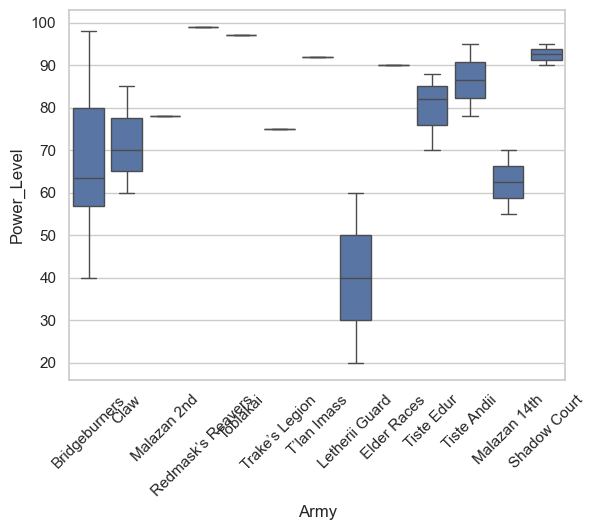

In [29]:
sns.boxplot(data=df, x='Army', y='Power_Level')
plt.xticks(rotation=45)
plt.show()